In [6]:
import numpy as np

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import seaborn as sns

# matplotlib 한글 설정 (전체 설정은 생략하고 개별적으로 font 적용)
plt.rcParams['font.family'] = 'NanumBarunGothic'

In [2]:
# 데이터 로드
products_df = pd.read_csv('../data/products_df_final.csv')
group_products_df = pd.read_csv('../data/group_product_df_final.csv')

# 데이터 기본 정보 확인
print("=== Products DataFrame ===")
print(f"Shape: {products_df.shape}")
print(products_df.head())
print(f"\nColumns: {products_df.columns.tolist()}")
print(f"\nData types:")
print(products_df.dtypes)

print("\n=== Group Products DataFrame ===")
print(f"Shape: {group_products_df.shape}")
print(group_products_df.head())
print(f"\nColumns: {group_products_df.columns.tolist()}")
print(f"\nData types:")
print(group_products_df.dtypes)

# category_id로 조인
merged_df = pd.merge(products_df, group_products_df, on='category_id', how='inner')
print(f"\n=== Merged DataFrame ===")
print(f"Shape after join: {merged_df.shape}")
print(merged_df.head())

# 결측값 확인
print(f"\n=== Missing Values ===")
print(merged_df.isnull().sum())

# 기본 통계
print(f"\n=== Basic Statistics ===")
print(merged_df.describe())

=== Products DataFrame ===
Shape: (200, 8)
   product_id  name  price                             img_url  rating  \
0           1  상품_1  93810  https://www.lorempixel.com/200/200     2.7   
1           2  상품_2  24592  https://www.lorempixel.com/200/200     1.8   
2           3  상품_3  13278     https://placekitten.com/200/200     3.2   
3           4  상품_4  46048      https://dummyimage.com/200x200     3.9   
4           5  상품_5  42098      https://dummyimage.com/200x200     1.8   

                 product_url  created_at  category_id  
0  http://www.jusighoesa.kr/  2025-03-03           25  
1    http://www.giminam.org/  2024-11-10           23  
2      https://hanseoan.net/  2024-08-01           21  
3        https://www.yu.com/  2025-02-20           31  
4             http://ju.com/  2024-11-17           32  

Columns: ['product_id', 'name', 'price', 'img_url', 'rating', 'product_url', 'created_at', 'category_id']

Data types:
product_id       int64
name            object
price     

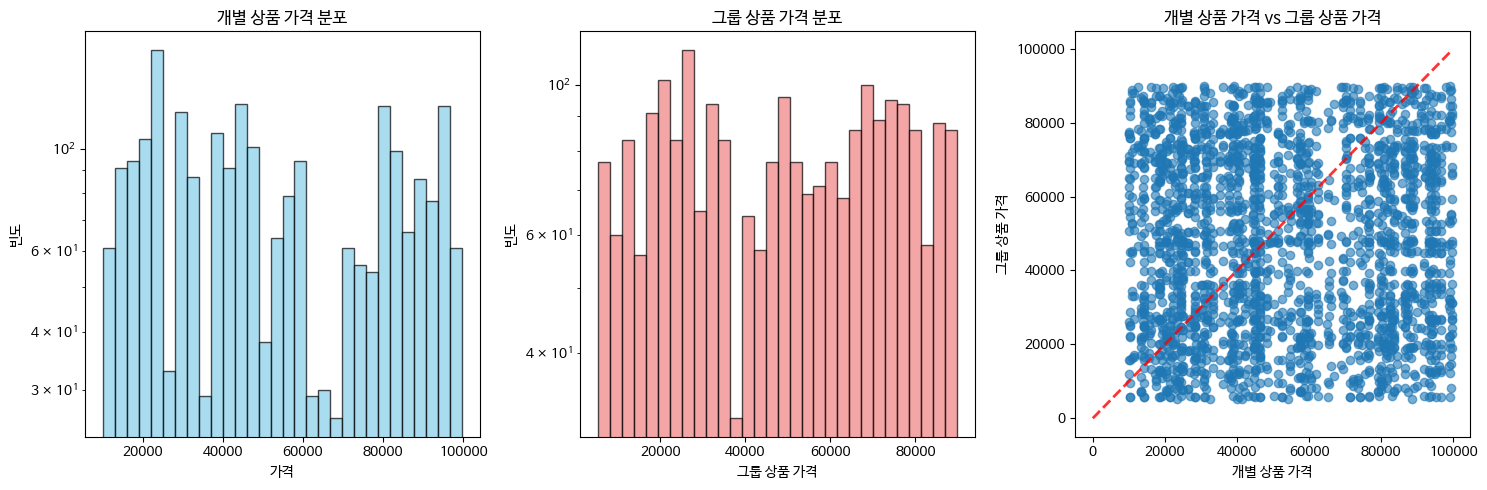

가격 차이 통계:
평균 차이: -4837.04
중앙값 차이: -5219.00
평균 비율: 1.30
중앙값 비율: 0.90


In [3]:
# 개별 상품 가격과 그룹 상품 가격 분포 비교
plt.figure(figsize=(15, 5))

# 개별 상품 가격 분포
plt.subplot(1, 3, 1)
plt.hist(merged_df['price'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('개별 상품 가격 분포')
plt.xlabel('가격')
plt.ylabel('빈도')
plt.yscale('log')

# 그룹 상품 가격 분포
plt.subplot(1, 3, 2)
plt.hist(merged_df['group_product_price'], bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
plt.title('그룹 상품 가격 분포')
plt.xlabel('그룹 상품 가격')
plt.ylabel('빈도')
plt.yscale('log')

# 가격 비교 산점도
plt.subplot(1, 3, 3)
plt.scatter(merged_df['price'], merged_df['group_product_price'], alpha=0.6)
plt.plot([0, merged_df[['price', 'group_product_price']].max().max()], 
         [0, merged_df[['price', 'group_product_price']].max().max()], 
         'r--', alpha=0.8, linewidth=2)
plt.xlabel('개별 상품 가격')
plt.ylabel('그룹 상품 가격')
plt.title('개별 상품 가격 vs 그룹 상품 가격')

plt.tight_layout()
plt.show()

# 가격 차이 계산
merged_df['price_difference'] = merged_df['group_product_price'] - merged_df['price']
merged_df['price_ratio'] = merged_df['group_product_price'] / merged_df['price']

print(f"가격 차이 통계:")
print(f"평균 차이: {merged_df['price_difference'].mean():.2f}")
print(f"중앙값 차이: {merged_df['price_difference'].median():.2f}")
print(f"평균 비율: {merged_df['price_ratio'].mean():.2f}")
print(f"중앙값 비율: {merged_df['price_ratio'].median():.2f}")

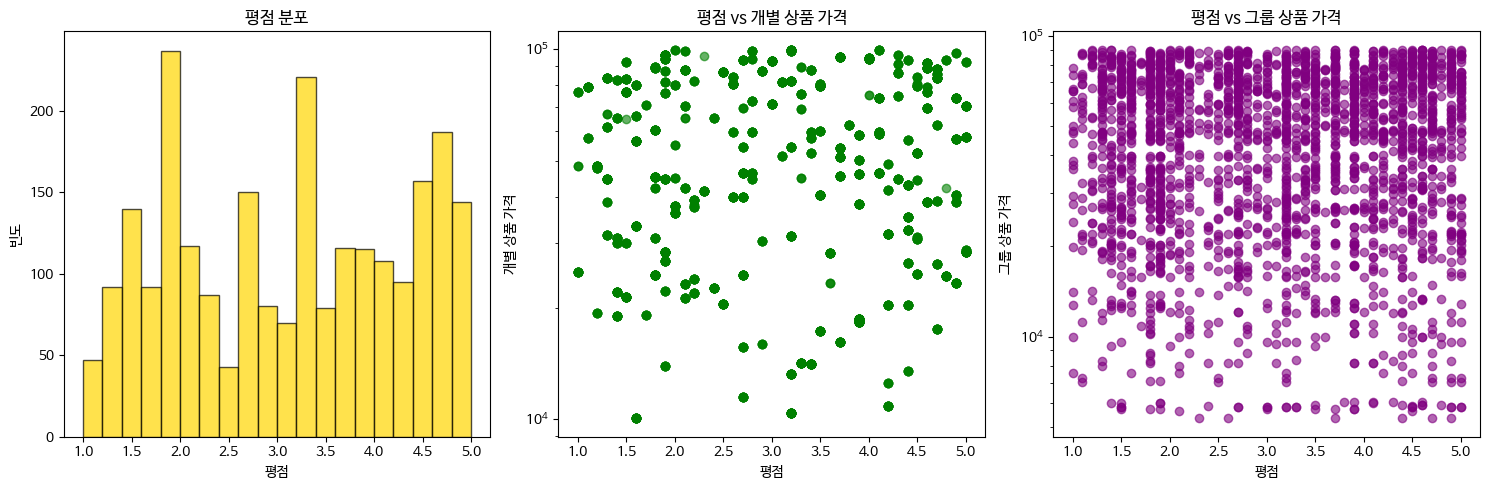

평점 구간별 통계:
           price                group_product_price          quantity       
            mean   median count                mean   median     mean median
rating                                                                      
매우낮음    49836.30  45093.0   476            47511.13  47046.5    49.17   52.0
낮음      54298.92  42325.0   429            48103.96  48370.0    50.36   51.0
보통      55764.55  54597.0   471            48129.03  47960.0    48.39   49.0
높음      49670.23  46463.0   474            48381.50  48727.0    49.86   52.5
매우높음    55911.13  57052.0   527            49220.35  49208.0    46.54   44.0


/tmp/ipykernel_4183/3239619782.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_stats = merged_df.groupby(rating_bins).agg({


In [4]:
# 평점 분석
plt.figure(figsize=(15, 5))

# 평점 분포
plt.subplot(1, 3, 1)
plt.hist(merged_df['rating'], bins=20, alpha=0.7, color='gold', edgecolor='black')
plt.title('평점 분포')
plt.xlabel('평점')
plt.ylabel('빈도')

# 평점과 개별 상품 가격의 관계
plt.subplot(1, 3, 2)
plt.scatter(merged_df['rating'], merged_df['price'], alpha=0.6, color='green')
plt.xlabel('평점')
plt.ylabel('개별 상품 가격')
plt.title('평점 vs 개별 상품 가격')
plt.yscale('log')

# 평점과 그룹 상품 가격의 관계
plt.subplot(1, 3, 3)
plt.scatter(merged_df['rating'], merged_df['group_product_price'], alpha=0.6, color='purple')
plt.xlabel('평점')
plt.ylabel('그룹 상품 가격')
plt.title('평점 vs 그룹 상품 가격')
plt.yscale('log')

plt.tight_layout()
plt.show()

# 평점 구간별 통계
rating_bins = pd.cut(merged_df['rating'], bins=5, labels=['매우낮음', '낮음', '보통', '높음', '매우높음'])
rating_stats = merged_df.groupby(rating_bins).agg({
    'price': ['mean', 'median', 'count'],
    'group_product_price': ['mean', 'median'],
    'quantity': ['mean', 'median']
}).round(2)

print("평점 구간별 통계:")
print(rating_stats)

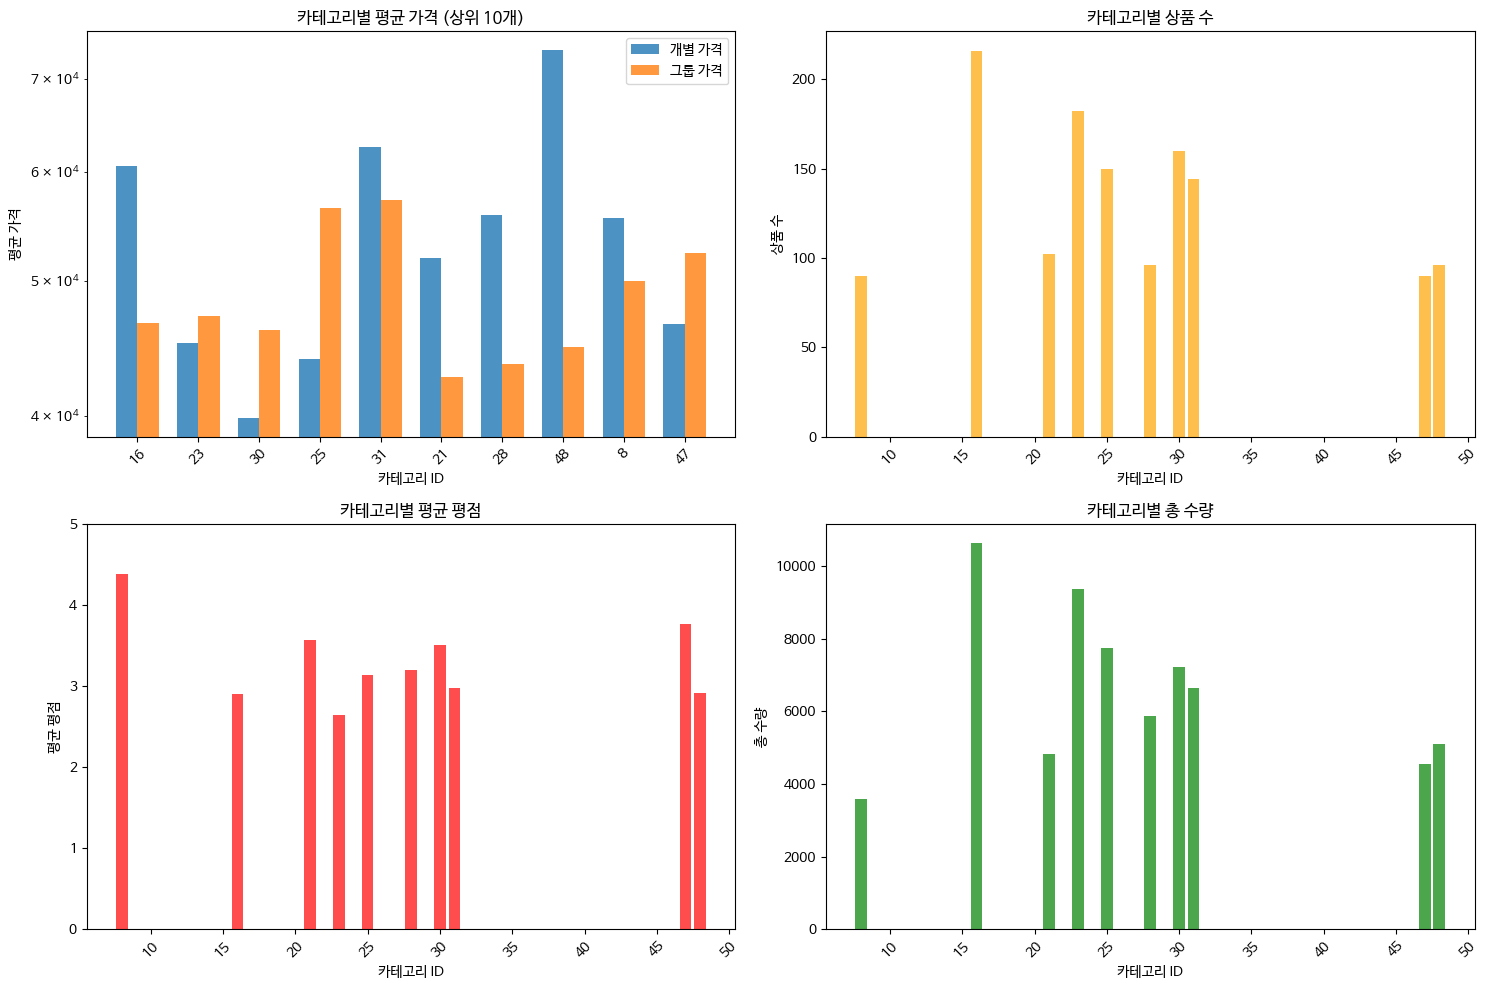

상품 수 기준 상위 10개 카테고리:
                price                          group_product_price           \
                 mean   median       std count                mean   median   
category_id                                                                   
16           60526.50  60817.5  31706.55   216            46638.15  46599.0   
23           45130.86  33416.0  26558.33   182            47184.58  42510.5   
30           39826.75  37355.0  23423.16   160            46136.80  43615.5   
25           43972.60  36428.0  27544.92   150            56488.93  62458.0   
31           62475.38  63354.0  21868.61   144            57212.22  61904.0   
21           51949.50  57609.5  26878.92   102            42678.65  49208.0   
28           55838.33  59476.0  20167.74    96            43560.56  48892.5   
48           73464.67  85399.5  25859.90    96            44830.31  45977.5   
8            55516.40  42953.0  25880.39    90            50017.22  43421.5   
47           46617.50  40628.0 

In [7]:
# 카테고리별 분석
category_stats = merged_df.groupby('category_id').agg({
    'price': ['mean', 'median', 'std', 'count'],
    'group_product_price': ['mean', 'median', 'std'],
    'rating': ['mean', 'median', 'std'],
    'quantity': ['mean', 'median', 'sum']
}).round(2)

# 상위 10개 카테고리 (상품 수 기준)
top_categories = category_stats.sort_values(('price', 'count'), ascending=False).head(10)

plt.figure(figsize=(15, 10))

# 카테고리별 평균 가격 비교
plt.subplot(2, 2, 1)
categories = top_categories.index
individual_prices = top_categories[('price', 'mean')]
group_prices = top_categories[('group_product_price', 'mean')]

x = np.arange(len(categories))
width = 0.35

plt.bar(x - width/2, individual_prices, width, label='개별 가격', alpha=0.8)
plt.bar(x + width/2, group_prices, width, label='그룹 가격', alpha=0.8)
plt.xlabel('카테고리 ID')
plt.ylabel('평균 가격')
plt.title('카테고리별 평균 가격 (상위 10개)')
plt.xticks(x, categories, rotation=45)
plt.legend()
plt.yscale('log')

# 카테고리별 상품 수
plt.subplot(2, 2, 2)
product_counts = top_categories[('price', 'count')]
plt.bar(categories, product_counts, alpha=0.7, color='orange')
plt.xlabel('카테고리 ID')
plt.ylabel('상품 수')
plt.title('카테고리별 상품 수')
plt.xticks(rotation=45)

# 카테고리별 평균 평점
plt.subplot(2, 2, 3)
avg_ratings = top_categories[('rating', 'mean')]
plt.bar(categories, avg_ratings, alpha=0.7, color='red')
plt.xlabel('카테고리 ID')
plt.ylabel('평균 평점')
plt.title('카테고리별 평균 평점')
plt.xticks(rotation=45)
plt.ylim(0, 5)

# 카테고리별 총 수량
plt.subplot(2, 2, 4)
total_quantities = top_categories[('quantity', 'sum')]
plt.bar(categories, total_quantities, alpha=0.7, color='green')
plt.xlabel('카테고리 ID')
plt.ylabel('총 수량')
plt.title('카테고리별 총 수량')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("상품 수 기준 상위 10개 카테고리:")
print(category_stats.sort_values(('price', 'count'), ascending=False).head(10))

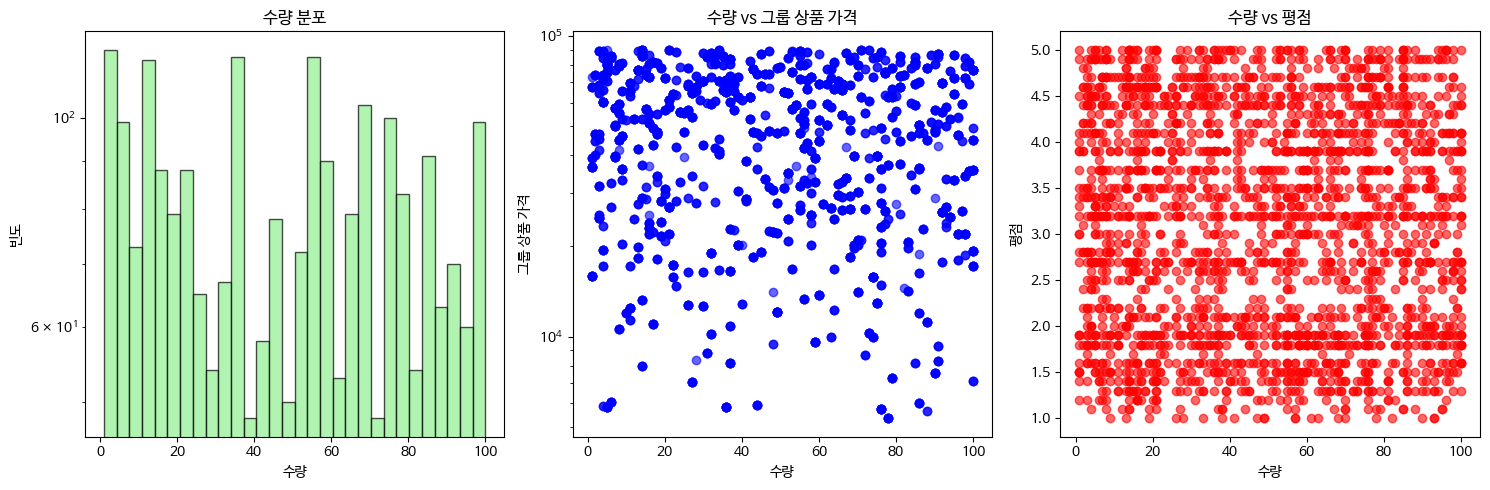

수량 구간별 통계:
             price          group_product_price          rating         \
              mean   median                mean   median   mean median   
quantity                                                                 
매우낮음      52739.00  47930.0            50997.68  51381.0   3.12    3.2   
낮음        53534.17  46463.0            50116.45  56445.0   3.17    3.2   
보통        50490.17  46421.0            48061.60  47655.0   3.02    3.1   
높음        55875.46  51347.0            44512.66  39832.0   3.06    3.2   
매우높음      53088.68  49117.0            47629.21  47726.0   3.09    3.2   

         quantity                    
              min  max   mean count  
quantity                             
매우낮음            1   17   8.97   493  
낮음             18   37  27.75   469  
보통             38   59  49.70   477  
높음             60   78  69.40   467  
매우높음           79  100  90.02   471  


/tmp/ipykernel_4183/316527189.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quantity_stats = merged_df.groupby(quantity_bins).agg({


In [8]:
# 수량 분석
plt.figure(figsize=(15, 5))

# 수량 분포
plt.subplot(1, 3, 1)
plt.hist(merged_df['quantity'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('수량 분포')
plt.xlabel('수량')
plt.ylabel('빈도')
plt.yscale('log')

# 수량과 그룹 상품 가격의 관계
plt.subplot(1, 3, 2)
plt.scatter(merged_df['quantity'], merged_df['group_product_price'], alpha=0.6, color='blue')
plt.xlabel('수량')
plt.ylabel('그룹 상품 가격')
plt.title('수량 vs 그룹 상품 가격')
plt.yscale('log')

# 수량과 평점의 관계
plt.subplot(1, 3, 3)
plt.scatter(merged_df['quantity'], merged_df['rating'], alpha=0.6, color='red')
plt.xlabel('수량')
plt.ylabel('평점')
plt.title('수량 vs 평점')

plt.tight_layout()
plt.show()

# 수량 구간별 통계
quantity_bins = pd.qcut(merged_df['quantity'], q=5, labels=['매우낮음', '낮음', '보통', '높음', '매우높음'])
quantity_stats = merged_df.groupby(quantity_bins).agg({
    'price': ['mean', 'median'],
    'group_product_price': ['mean', 'median'],
    'rating': ['mean', 'median'],
    'quantity': ['min', 'max', 'mean', 'count']
}).round(2)

print("수량 구간별 통계:")
print(quantity_stats)

/workspace/.venv/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.draw()
/workspace/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


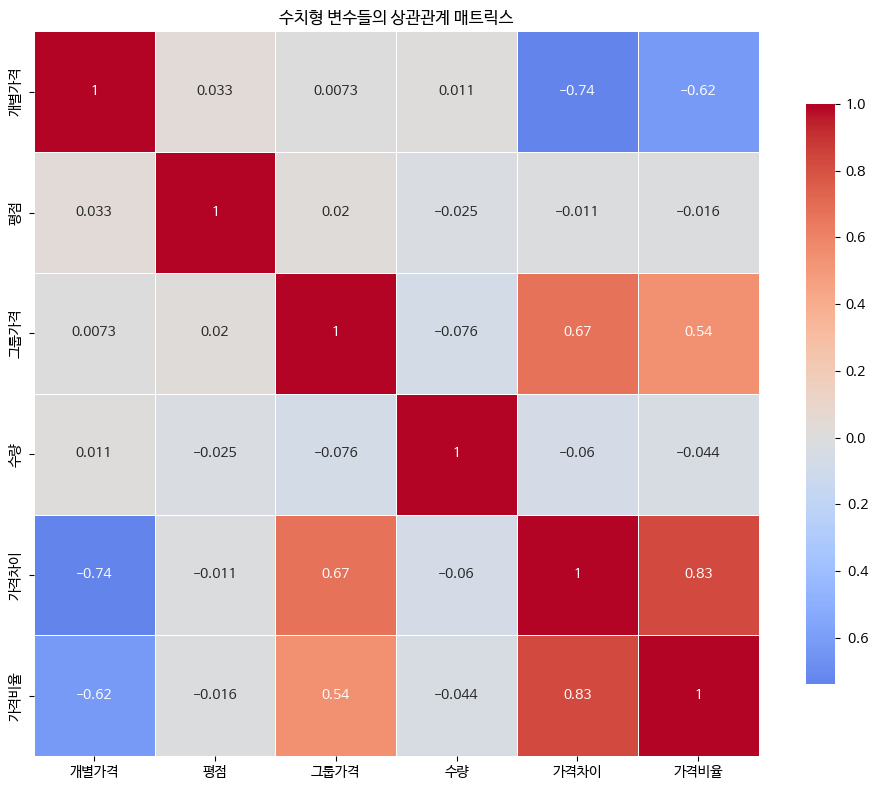

강한 상관관계 (|r| > 0.3):
   변수 1  변수 2   상관계수
4  가격차이  가격비율  0.826
0  개별가격  가격차이 -0.737
2  그룹가격  가격차이  0.671
1  개별가격  가격비율 -0.620
3  그룹가격  가격비율  0.541


In [9]:
# 상관관계 분석
numeric_columns = ['price', 'rating', 'group_product_price', 'quantity', 'price_difference', 'price_ratio']
correlation_matrix = merged_df[numeric_columns].corr()

# 컬럼명을 한글로 변경
column_labels = ['개별가격', '평점', '그룹가격', '수량', '가격차이', '가격비율']
correlation_matrix.columns = column_labels
correlation_matrix.index = column_labels

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('수치형 변수들의 상관관계 매트릭스')
plt.tight_layout()
plt.show()

# 강한 상관관계 쌍 찾기
correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.3:  # 0.3 이상의 상관관계
            correlation_pairs.append({
                '변수 1': correlation_matrix.columns[i],
                '변수 2': correlation_matrix.columns[j],
                '상관계수': round(corr_value, 3)
            })

correlation_df = pd.DataFrame(correlation_pairs).sort_values('상관계수', key=abs, ascending=False)
print("강한 상관관계 (|r| > 0.3):")
print(correlation_df)

가격 차이 분석:
그룹 가격 > 개별 가격인 상품: 1062개 (44.7%)
그룹 가격 < 개별 가격인 상품: 1315개 (55.3%)
그룹 가격 = 개별 가격인 상품: 0개 (0.0%)

가격이 가장 많이 오른 상품 (상위 5개):
      product_id  category_id  price  group_product_price  price_difference
400           31           11  10851                88776             77925
406           31           11  10851                88006             77155
2152         179           24  12552                89594             77042
1738         145           45  11504                88023             76519
1869         158           30  10425                85859             75434

가격이 가장 많이 내린 상품 (상위 5개):
      product_id  category_id  price  group_product_price  price_difference
1749         146           40  99166                 5643            -93523
1769         148           17  99353                 8149            -91204
743           62           16  96673                 5730            -90943
315           24           16  95181                 5730            -89451
1074   

/tmp/ipykernel_4183/4216710085.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_diff_by_rating = merged_df.groupby(rating_bins)['price_difference'].mean()
/tmp/ipykernel_4183/4216710085.py:53: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_diff_by_quantity = merged_df.groupby(quantity_bins)['price_difference'].mean()
/tmp/ipykernel_4183/4216710085.py:67: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  plt.tight_layout()
/workspace/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Nan

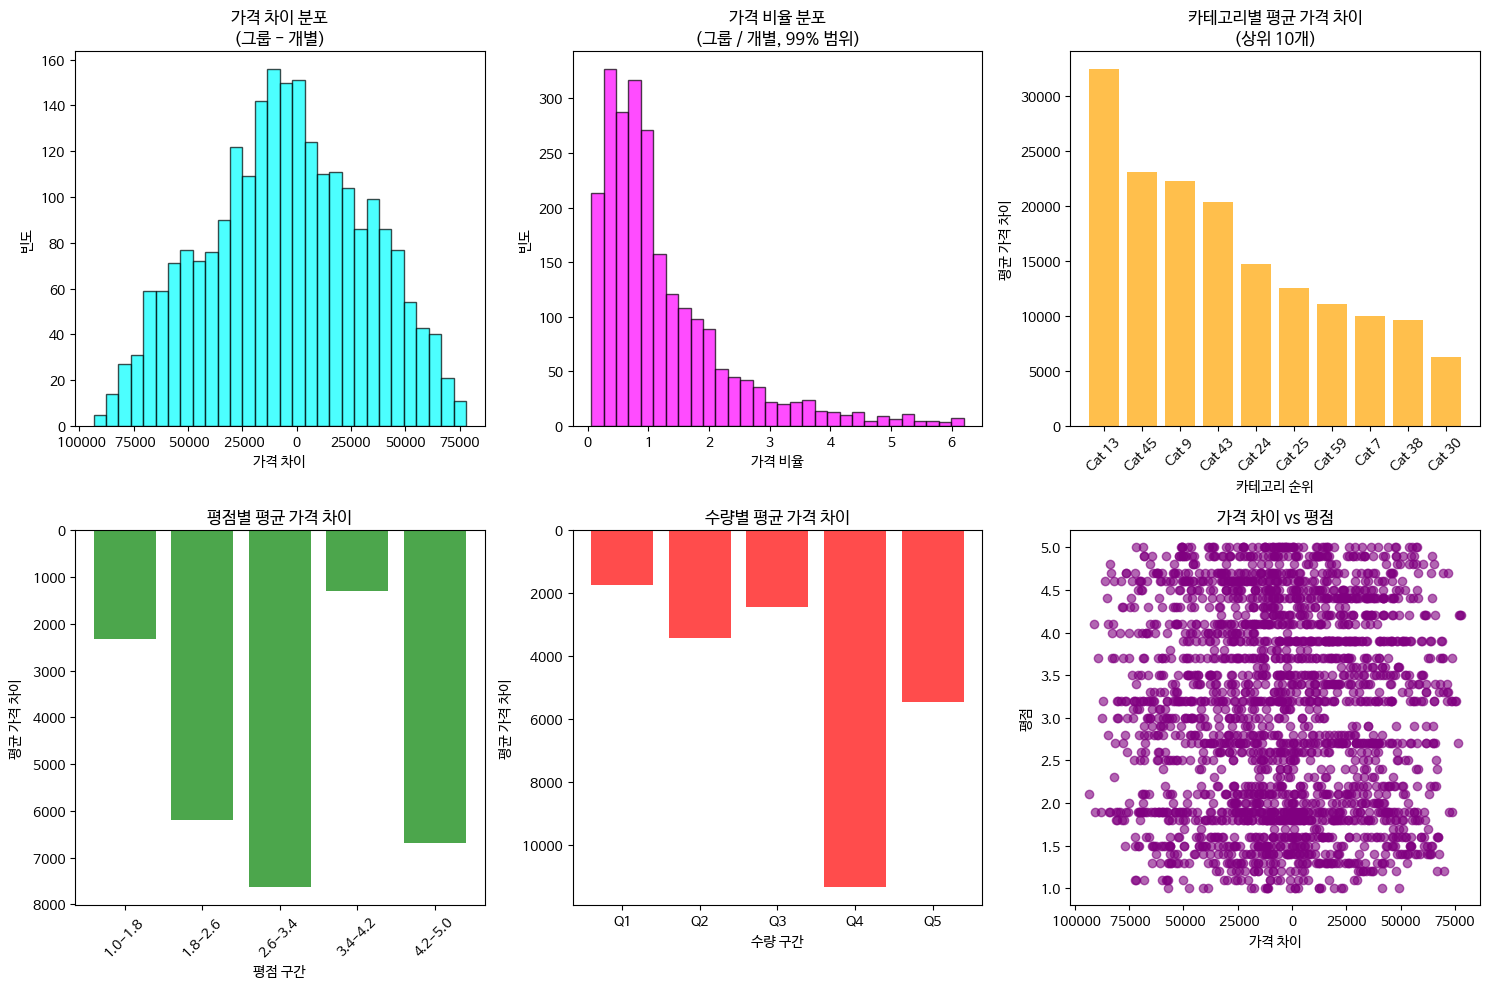

Price difference analysis:
Products where group price > individual price: 1062 (44.7%)
Products where group price < individual price: 1315 (55.3%)
Products where group price = individual price: 0 (0.0%)

Largest price increases (top 5):
      product_id  category_id  price  group_product_price  price_difference
400           31           11  10851                88776             77925
406           31           11  10851                88006             77155
2152         179           24  12552                89594             77042
1738         145           45  11504                88023             76519
1869         158           30  10425                85859             75434

Largest price decreases (top 5):
      product_id  category_id  price  group_product_price  price_difference
1749         146           40  99166                 5643            -93523
1769         148           17  99353                 8149            -91204
743           62           16  96673         

In [10]:
# 가격 차이 통계
print("가격 차이 분석:")
print(f"그룹 가격 > 개별 가격인 상품: {(merged_df['price_difference'] > 0).sum()}개 ({(merged_df['price_difference'] > 0).mean()*100:.1f}%)")
print(f"그룹 가격 < 개별 가격인 상품: {(merged_df['price_difference'] < 0).sum()}개 ({(merged_df['price_difference'] < 0).mean()*100:.1f}%)")
print(f"그룹 가격 = 개별 가격인 상품: {(merged_df['price_difference'] == 0).sum()}개 ({(merged_df['price_difference'] == 0).mean()*100:.1f}%)")

print(f"\n가격이 가장 많이 오른 상품 (상위 5개):")
print(merged_df.nlargest(5, 'price_difference')[['product_id', 'category_id', 'price', 'group_product_price', 'price_difference']])

print(f"\n가격이 가장 많이 내린 상품 (상위 5개):")
print(merged_df.nsmallest(5, 'price_difference')[['product_id', 'category_id', 'price', 'group_product_price', 'price_difference']])
plt.figure(figsize=(15, 10))

# 가격 차이 분포
plt.subplot(2, 3, 1)
plt.hist(merged_df['price_difference'], bins=30, alpha=0.7, color='cyan', edgecolor='black')
plt.title('가격 차이 분포\n(그룹 - 개별)')
plt.xlabel('가격 차이')
plt.ylabel('빈도')

# 가격 비율 분포
plt.subplot(2, 3, 2)
# 극값 제거를 위해 99% 범위만 표시
price_ratio_99 = merged_df['price_ratio'].quantile(0.99)
filtered_ratio = merged_df[merged_df['price_ratio'] <= price_ratio_99]['price_ratio']
plt.hist(filtered_ratio, bins=30, alpha=0.7, color='magenta', edgecolor='black')
plt.title('가격 비율 분포\n(그룹 / 개별, 99% 범위)')
plt.xlabel('가격 비율')
plt.ylabel('빈도')

# 카테고리별 평균 가격 차이
plt.subplot(2, 3, 3)
category_price_diff = merged_df.groupby('category_id')['price_difference'].mean().sort_values(ascending=False).head(10)
plt.bar(range(len(category_price_diff)), category_price_diff.values, alpha=0.7, color='orange')
plt.title('카테고리별 평균 가격 차이\n(상위 10개)')
plt.xlabel('카테고리 순위')
plt.ylabel('평균 가격 차이')
plt.xticks(range(len(category_price_diff)), [f'Cat {cat}' for cat in category_price_diff.index], rotation=45)

# 평점별 가격 차이
plt.subplot(2, 3, 4)
rating_bins = pd.cut(merged_df['rating'], bins=5)
price_diff_by_rating = merged_df.groupby(rating_bins)['price_difference'].mean()
plt.bar(range(len(price_diff_by_rating)), price_diff_by_rating.values, alpha=0.7, color='green')
plt.title('평점별 평균 가격 차이')
plt.xlabel('평점 구간')
plt.ylabel('평균 가격 차이')
plt.xticks(range(len(price_diff_by_rating)), [f'{interval.left:.1f}-{interval.right:.1f}' for interval in price_diff_by_rating.index], rotation=45)

# 수량별 가격 차이
plt.subplot(2, 3, 5)
quantity_bins = pd.qcut(merged_df['quantity'], q=5)
price_diff_by_quantity = merged_df.groupby(quantity_bins)['price_difference'].mean()
plt.bar(range(len(price_diff_by_quantity)), price_diff_by_quantity.values, alpha=0.7, color='red')
plt.title('수량별 평균 가격 차이')
plt.xlabel('수량 구간')
plt.ylabel('평균 가격 차이')
plt.xticks(range(len(price_diff_by_quantity)), ['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])

# 가격 차이와 평점의 관계
plt.subplot(2, 3, 6)
plt.scatter(merged_df['price_difference'], merged_df['rating'], alpha=0.6, color='purple')
plt.xlabel('가격 차이')
plt.ylabel('평점')
plt.title('가격 차이 vs 평점')

plt.tight_layout()
plt.show()

# 가격 차이 통계
print("Price difference analysis:")
print(f"Products where group price > individual price: {(merged_df['price_difference'] > 0).sum()} ({(merged_df['price_difference'] > 0).mean()*100:.1f}%)")
print(f"Products where group price < individual price: {(merged_df['price_difference'] < 0).sum()} ({(merged_df['price_difference'] < 0).mean()*100:.1f}%)")
print(f"Products where group price = individual price: {(merged_df['price_difference'] == 0).sum()} ({(merged_df['price_difference'] == 0).mean()*100:.1f}%)")

print(f"\nLargest price increases (top 5):")
print(merged_df.nlargest(5, 'price_difference')[['product_id', 'category_id', 'price', 'group_product_price', 'price_difference']])

print(f"\nLargest price decreases (top 5):")
print(merged_df.nsmallest(5, 'price_difference')[['product_id', 'category_id', 'price', 'group_product_price', 'price_difference']])